<a href="https://colab.research.google.com/github/maddoMaddz/netflix-data-analysis/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

In [ ]:
# Step 1: Data collection
from google.colab import files
uploaded = files.upload()


Saving netflix1.csv to netflix1.csv


In [ ]:
import pandas as pd

# Step 2: Loading the dataset
data = pd.read_csv('netflix1.csv')  # Adjust file path if necessary

# Initial Exploration
print("Dataset Info:")
data.info()
print("\nFirst Few Rows of Data:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB

First Few Rows of Data:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     

In [ ]:
# Basic Descriptive Statistics
print("Basic Descriptive Statistics:")
print(data.describe(include='all'))


Basic Descriptive Statistics:
       show_id   type  title   director        country  \
count     8790   8790   8790       8790           8790   
unique    8790      2   8787       4528             86   
top         s1  movie  9-Feb  Not Given  united states   
freq         1   6126      2       2588           3240   
mean       NaN    NaN    NaN        NaN            NaN   
min        NaN    NaN    NaN        NaN            NaN   
25%        NaN    NaN    NaN        NaN            NaN   
50%        NaN    NaN    NaN        NaN            NaN   
75%        NaN    NaN    NaN        NaN            NaN   
max        NaN    NaN    NaN        NaN            NaN   
std        NaN    NaN    NaN        NaN            NaN   

                           date_added  release_year rating  duration  \
count                            8790   8790.000000   8790      8790   
unique                            NaN           NaN     14       220   
top                               NaN           NaN  tv-m

In [ ]:
print("\nSummary Statistics for Release Year:")
print(data['release_year'].describe())


Summary Statistics for Release Year:
count    8790.000000
mean     2014.183163
std         8.825466
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


In [ ]:
# convert 'duration' for movies
if data['type'].str.lower().str.contains('movie').any():
    data['movie_duration'] = data['duration'].apply(lambda x: int(x.replace(' min', '')) if 'min' in x else None)
    print("\nSummary Statistics for Movie Duration:")
    print(data['movie_duration'].describe())


Summary Statistics for Movie Duration:
count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_duration, dtype: float64


In [ ]:
# 3. Frequency Counts for Categorical Columns
print("\nFrequency Counts for Content Type (Movies vs TV Shows):")
print(data['type'].value_counts())

print("\nFrequency Counts for Ratings:")
print(data['rating'].value_counts())

print("\nFrequency Counts for Top 10 Countries:")
print(data['country'].value_counts().head(10))



Frequency Counts for Content Type (Movies vs TV Shows):
type
movie      6126
tv show    2664
Name: count, dtype: int64

Frequency Counts for Ratings:
rating
tv-ma       3205
tv-14       2157
tv-pg        861
r            799
pg-13        490
tv-y7        333
tv-y         306
pg           287
tv-g         220
nr            79
g             41
tv-y7-fv       6
nc-17          3
ur             3
Name: count, dtype: int64

Frequency Counts for Top 10 Countries:
country
united states     3240
india             1057
united kingdom     638
pakistan           421
not given          287
canada             271
japan              259
south korea        214
france             213
spain              182
Name: count, dtype: int64


In [ ]:
# 5. Central Tendency Measures for Movie Duration

if 'movie_duration' in data.columns:
    mean_duration = data['movie_duration'].mean()
    median_duration = data['movie_duration'].median()
    mode_duration = data['movie_duration'].mode()[0]
    print("\nCentral Tendency Measures for Movie Duration:")
    print(f"Mean Duration: {mean_duration}")
    print(f"Median Duration: {median_duration}")
    print(f"Mode Duration: {mode_duration}")



Central Tendency Measures for Movie Duration:
Mean Duration: 99.58488410055502
Median Duration: 98.0
Mode Duration: 90.0


# **Data Cleaning and Preprocessing**

In [ ]:
# Step 3: Data Cleaning and Preprocessing

# 3.1 Missing Values
print("\nMissing Values Count:")
print(data.isnull().sum())



Missing Values Count:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
# dropping rows where critical information (like 'title' or 'type') is missing
data = data.dropna(subset=['title', 'type'])

In [ ]:
# 3.2 Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Handling any rows where 'date_added' could not be converted
data = data.dropna(subset=['date_added'])

In [ ]:
# 3.3 Process the 'duration' column
# Separating duration values for movies (in minutes) and TV shows (number of seasons)
def process_duration(duration, type_):
    if type_ == 'Movie':
        # To extract the number of minutes for movies
        return int(duration.replace(' min', ''))
    elif type_ == 'TV Show':
        # To extract the number of seasons for TV shows
        return int(duration.replace(' Season', '').replace('s', ''))
    else:
        return None

data['duration_processed'] = data.apply(lambda row: process_duration(row['duration'], row['type']), axis=1)

In [ ]:
# 3.4 Cleaning text columns by converting to lowercase
data['type'] = data['type'].str.lower()
data['rating'] = data['rating'].str.lower()
data['country'] = data['country'].str.lower()
data['listed_in'] = data['listed_in'].str.lower()


In [ ]:
# 3.5 Convert numeric columns (release_year) to integer type
data['release_year'] = data['release_year'].astype(int)


In [ ]:
# Step 4: Final Inspection of Preprocessed Data
print("\nProcessed Data Info:")
data.info()
print("\nSample of Processed Data:")
print(data.head())


Processed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             8790 non-null   object        
 1   type                8790 non-null   object        
 2   title               8790 non-null   object        
 3   director            8790 non-null   object        
 4   country             8790 non-null   object        
 5   date_added          8790 non-null   datetime64[ns]
 6   release_year        8790 non-null   int64         
 7   rating              8790 non-null   object        
 8   duration            8790 non-null   object        
 9   listed_in           8790 non-null   object        
 10  duration_processed  8790 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 755.5+ KB

Sample of Processed Data:
  show_id     type                           

# **Exploratory Analysis**

In [ ]:
# Step 5: Exploratory analysis
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-22-2744ce01c3a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='viridis')


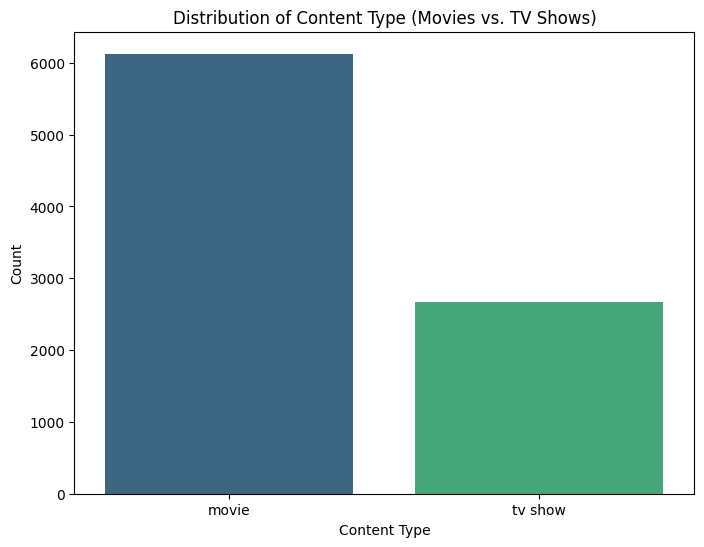

In [ ]:
# Count of Movies vs. TV Shows
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type', palette='viridis')
plt.title("Distribution of Content Type (Movies vs. TV Shows)")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


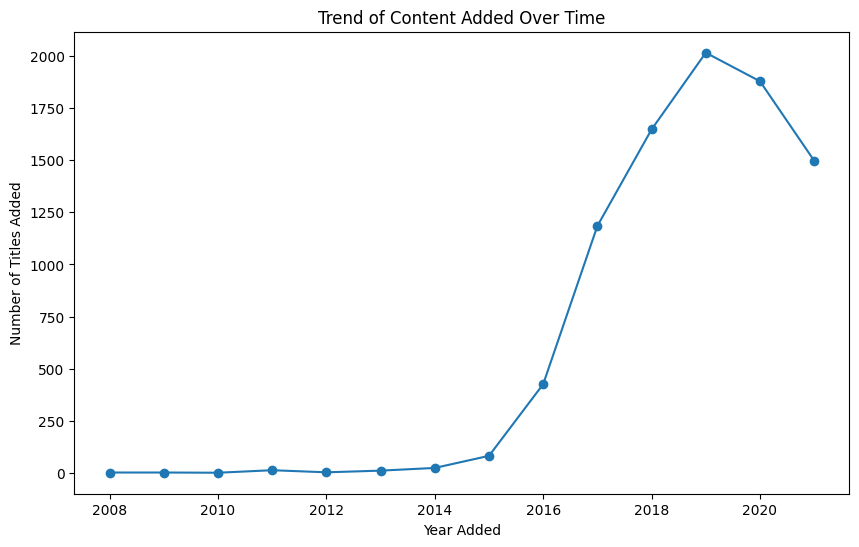

In [ ]:
# Extract the year from the 'date_added' column
data['year_added'] = pd.DatetimeIndex(data['date_added']).year

# Count of titles added per year
plt.figure(figsize=(10, 6))
data['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Trend of Content Added Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.show()


<ipython-input-24-447d77b6b567>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


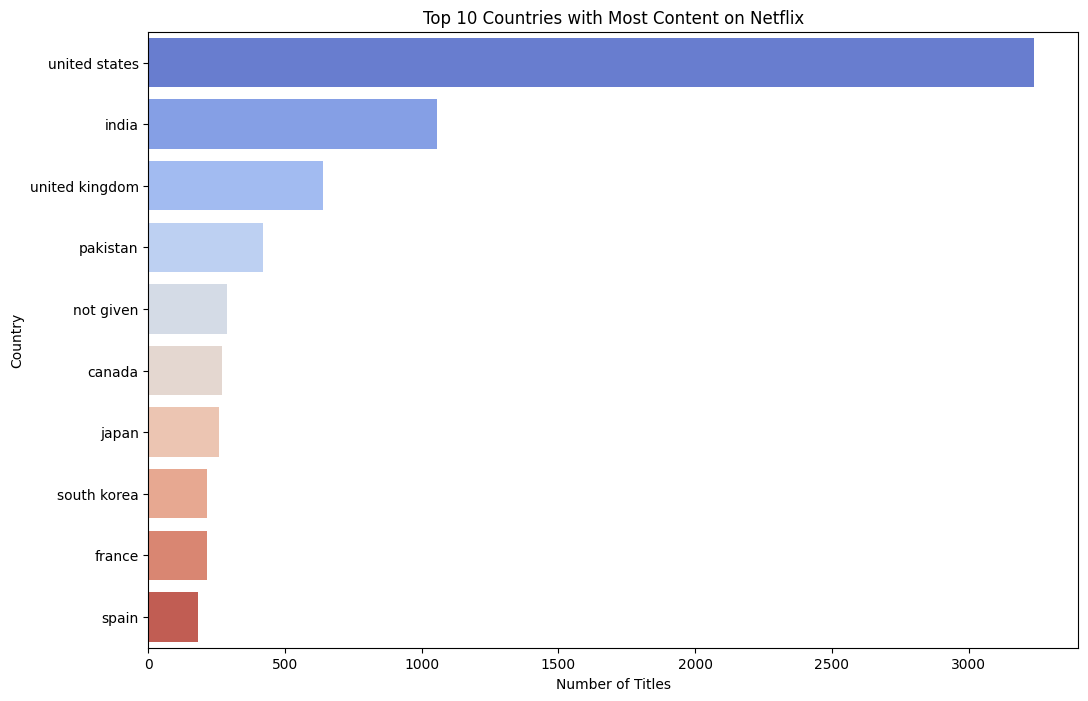

In [ ]:
# Top 10 Countries with Most Content
top_countries = data['country'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


<ipython-input-25-01e9396e25b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='rating', order=data['rating'].value_counts().index, palette='magma')


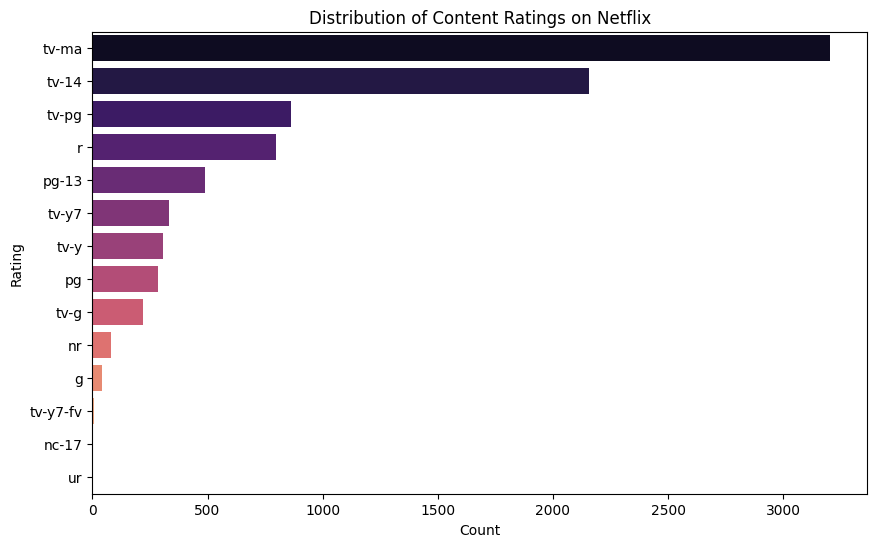

In [ ]:
# Distribution of Content Ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='rating', order=data['rating'].value_counts().index, palette='magma')
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


<ipython-input-26-4ccbfb117c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(int)


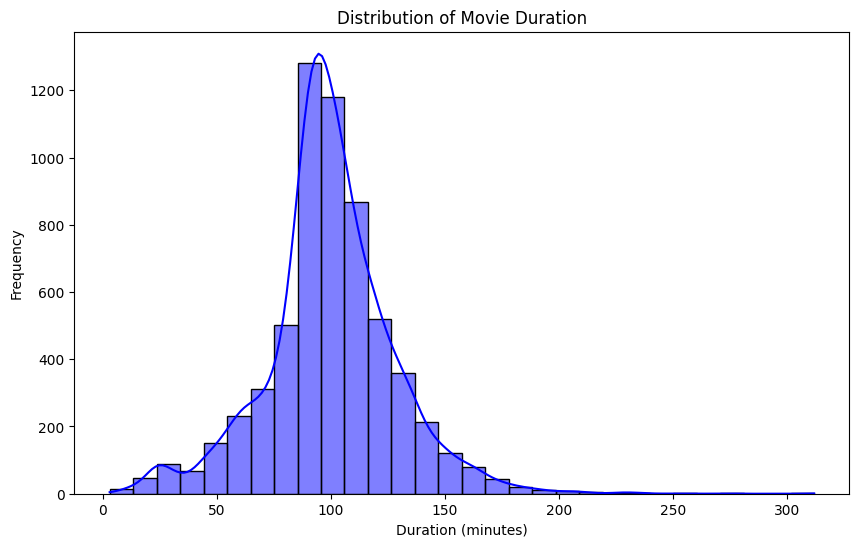

In [ ]:
# Filter for movies and convert 'duration' to numeric
movies_data = data[data['type'] == 'movie']
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(int)

# Plot the duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['duration'], bins=30, kde=True, color='blue')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


# **Hypothesis testing**

Hypothesis: "Movies on Netflix tend to have higher ratings (like 'R' or 'TV-MA') compared to TV Shows."

**Null Hypothesis (H0)**: There is no significant difference in the proportion of high-rated content between movies and TV shows.

**Alternative Hypothesis (H1)**: Movies are more likely to have higher ratings (e.g., 'R' or 'TV-MA') compared to TV shows.

Using **chi-square test for independence** to compare the proportions of high-rated content between two categories

In [ ]:
# Preparing the data for testing
import pandas as pd
from scipy.stats import chi2_contingency

high_ratings = ['r', 'tv-ma']

# To add a new column to classify each title as high-rated or not
data['is_high_rated'] = data['rating'].str.lower().isin(high_ratings)

# To create a contingency table for the chi-square test
contingency_table = pd.crosstab(data['type'], data['is_high_rated'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
is_high_rated  False  True 
type                       
movie           3267   2859
tv show         1519   1145


In [ ]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)



Chi-Square Test Results
Chi2 Statistic: 10.041379846914175
P-value: 0.0015306250680072468
Degrees of Freedom: 1
Expected Frequencies:
[[3335.49897611 2790.50102389]
 [1450.50102389 1213.49897611]]


# **Interpretation of results**

Using the **significance level as 0.05**

p-value (0.00153) ≤ α (0.05), we reject the null hypothesis.

This means there's a statistically significant difference in the proportions of high-rated content between movies and TV shows.